Задача №1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.479e+04
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          8.18e-149
Time:                        03:44:25   Log-Likelihood:                 77.382
No. Observations:                 100   AIC:                            -148.8
Df Residuals:                      97   BIC:                            -140.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0149      0.017     59.470      0.0

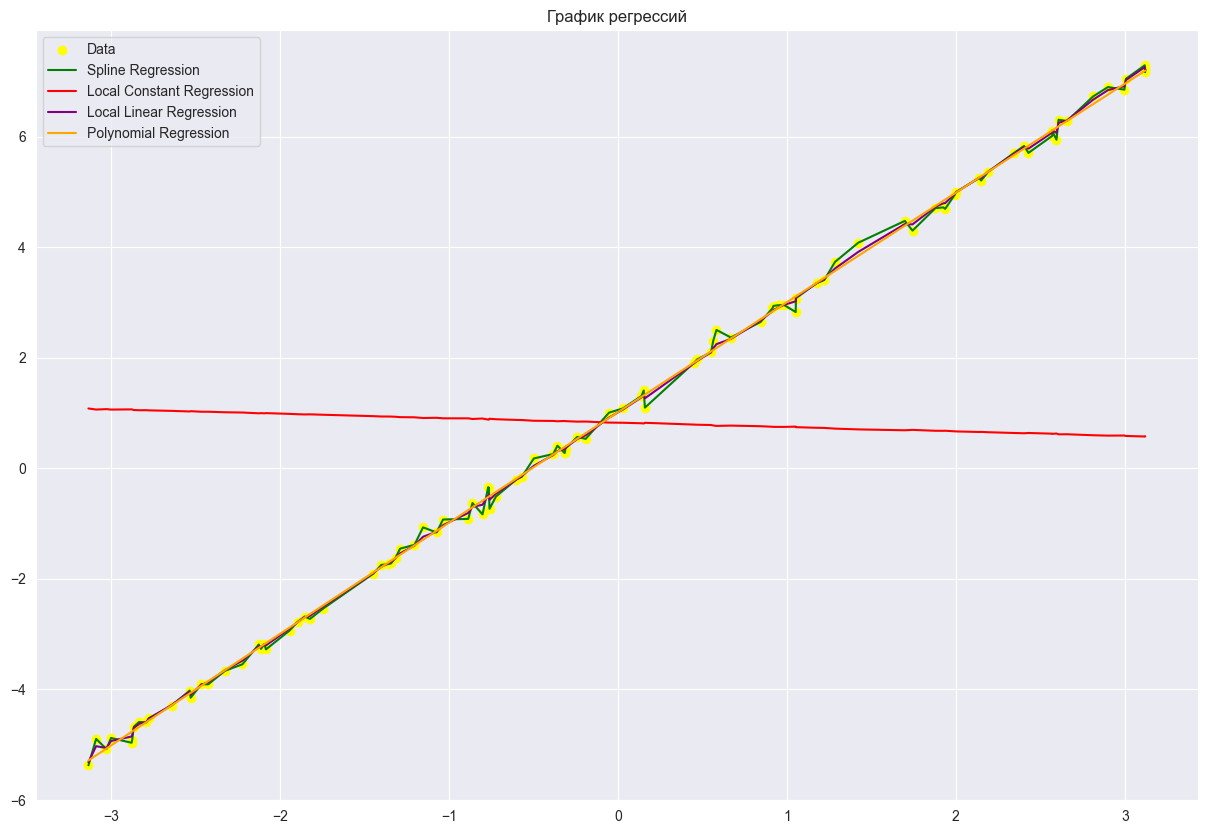

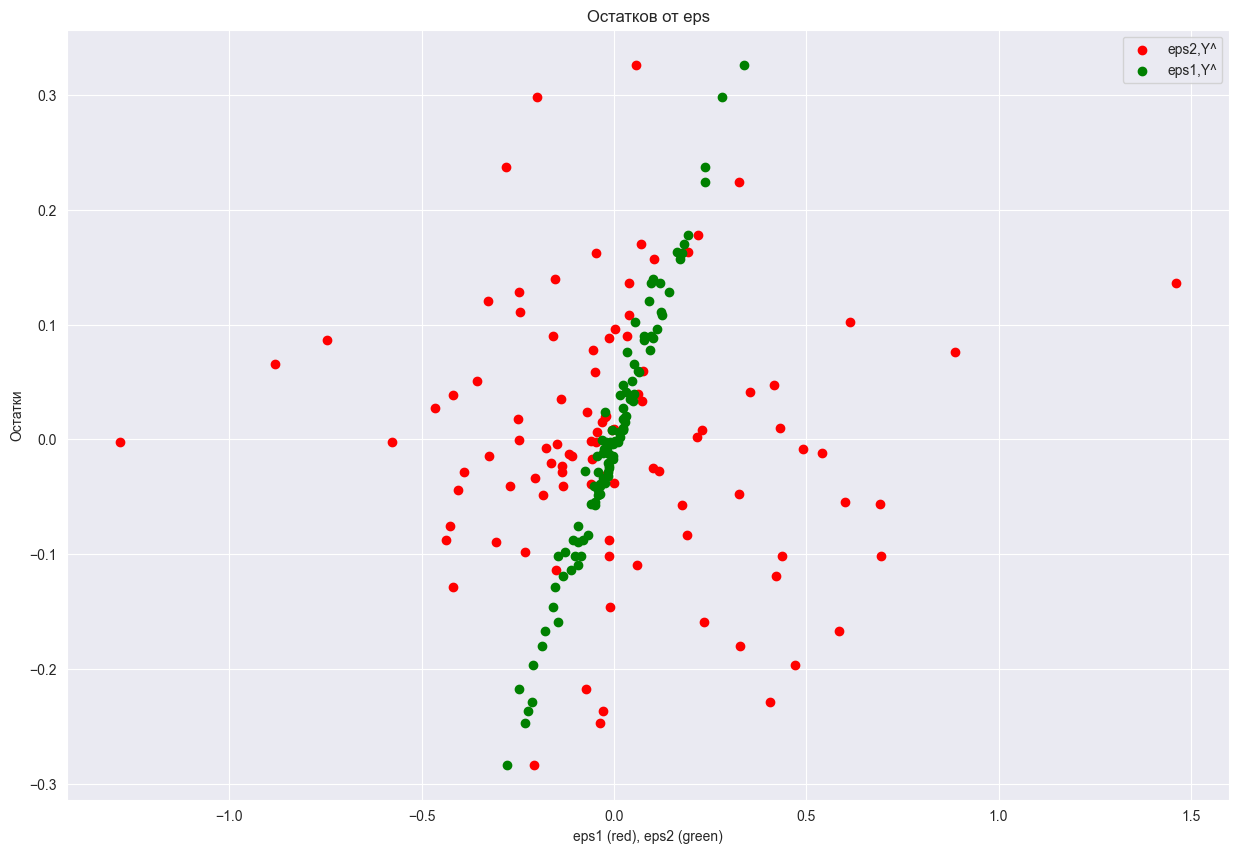

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5217.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.86e-99
Time:                        03:44:26   Log-Likelihood:                -40.810
No. Observations:                 100   AIC:                             87.62
Df Residuals:                      97   BIC:                             95.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9711      0.056     17.452      0.0

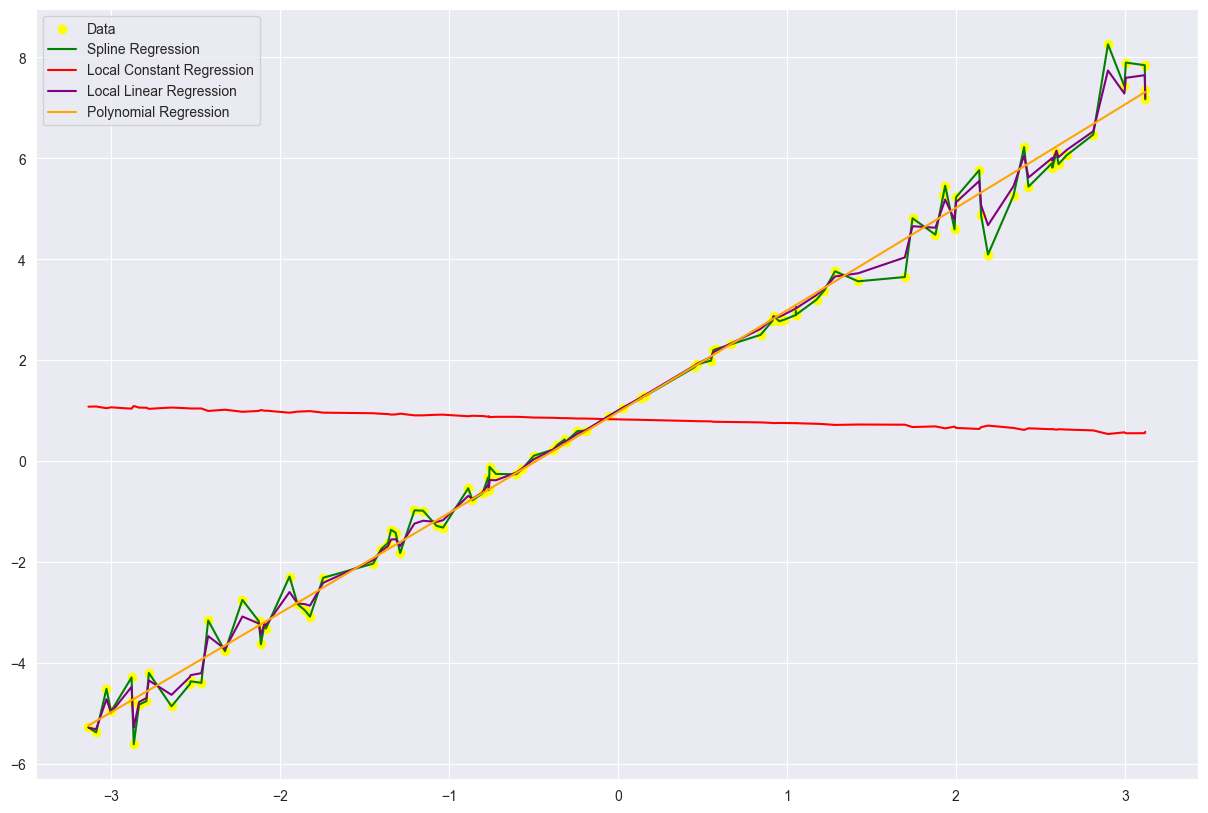

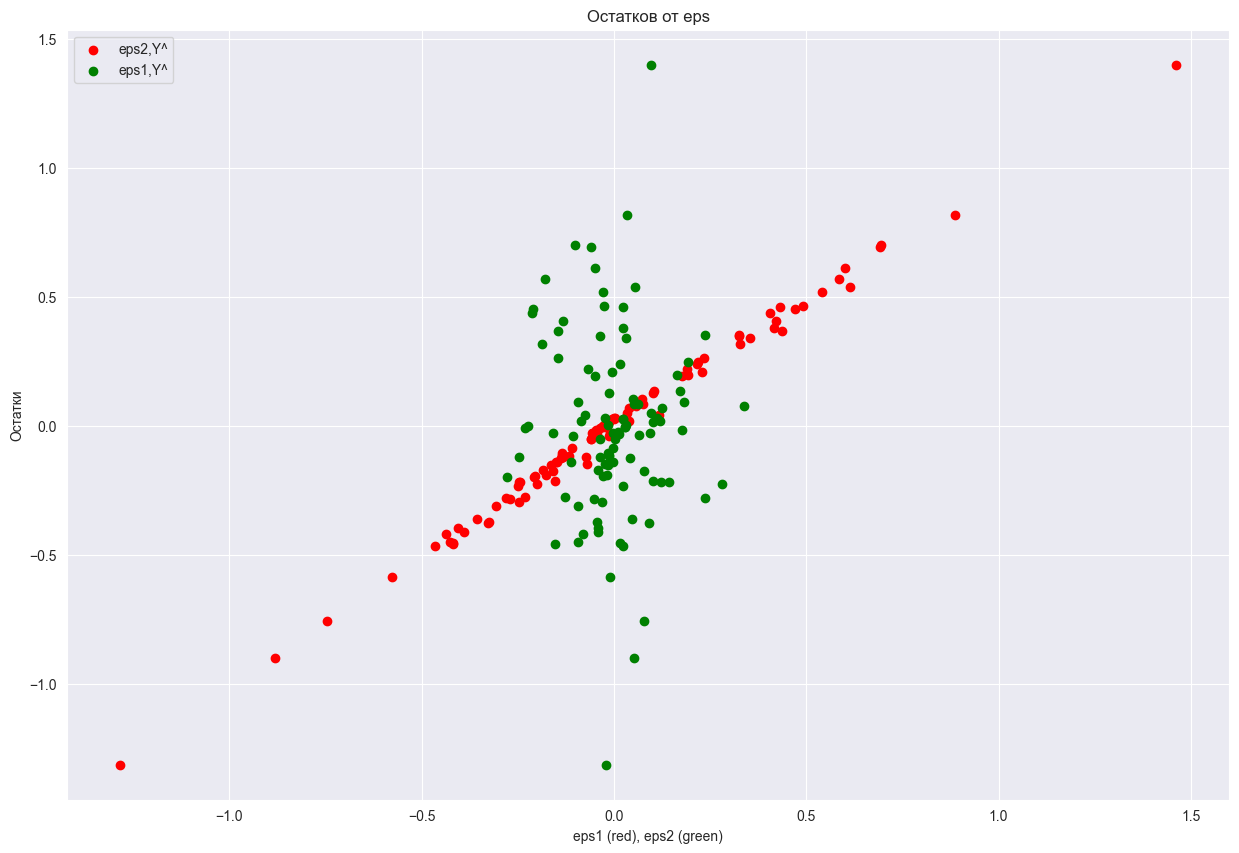

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     53.49
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.21e-16
Time:                        03:44:26   Log-Likelihood:                -67.318
No. Observations:                 100   AIC:                             140.6
Df Residuals:                      97   BIC:                             148.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9741      0.073     13.429      0.0

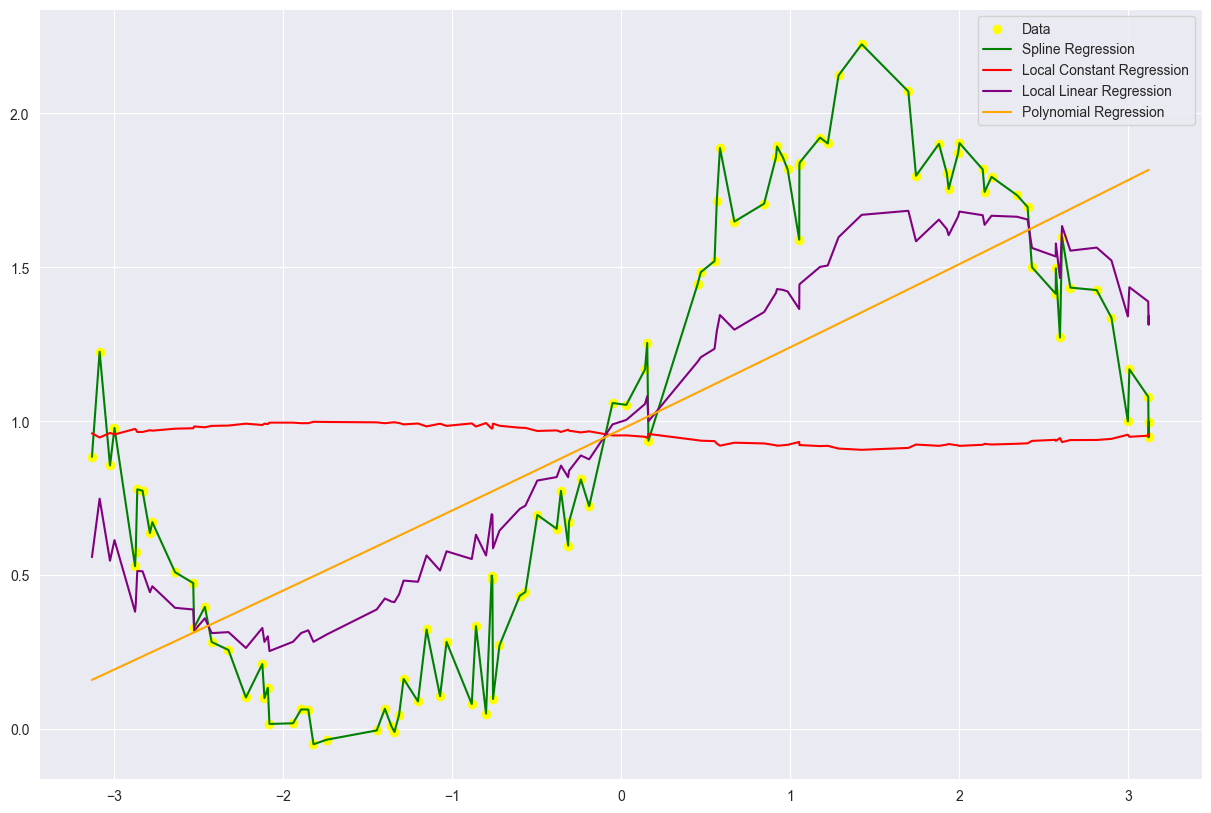

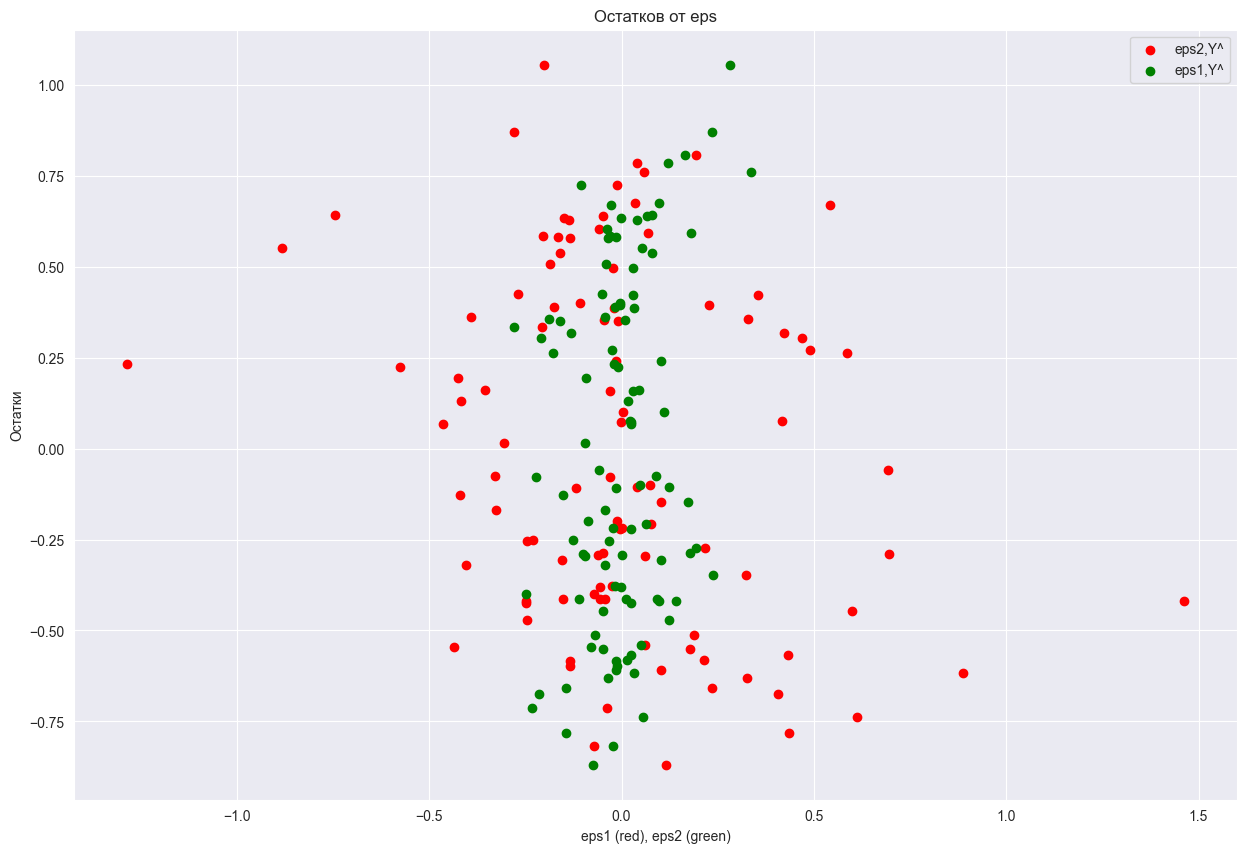

RSS for Spline Regression: 3.948740183508226e-30
RSS for Local Constant Regression: 57.832662046566384
RSS for Local Linear Regression: 7.580846668237983
RSS for Polynomial Regression: 26.096037787368402
R-squared for Polynomial Regression:  0.5018663475717278
R-squared for Local Constant Regression:  1.0000000000000002
R-squared for Local Linear Regression:  0.8952237844408761
R-squared for Spline Regression: 1.0


AttributeError: 'KernelReg' object has no attribute 'model'

In [55]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import summary_table


n = 100

#Var a
X0 = np.ones(n)
X = np.random.uniform(-math.pi,math.pi, n)
X.sort()
eps_1 = np.random.normal(0,0.1, n)
eps_2 = np.random.normal(0, abs(X/5), n)
Y_11 = 2*X + 1 + eps_1
Y_12 = 2*X + 1 + eps_2
Y_21 = np.sin(X) + eps_1 +1
Y_22 = np.sin(X) + eps_2 +1
df = pd.DataFrame({'X': X, 
                   'Y_11': Y_11, 
                   'Y_12': Y_12, 
                   'Y_21': Y_21, 
                   'Y_22': Y_22})

# model = statsmodels.nonparametric.kernel_regression.KernelReg(X, Y_11, 'u', reg_type = "lc").fit() 
# print(model)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]    
    tck = splrep(x_sorted, y_sorted, s=0)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth


# Построение регрессий и сравнение моделей

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken']
for kernel in kernels:
    results_lc_11 = local_constant_regression(X, Y_11, kernel)
    results_ll_11 = local_linear_regression(X, Y_11, kernel)
    results_lc_12 = local_constant_regression(X, Y_12, kernel)
    results_ll_12 = local_linear_regression(X, Y_12, kernel)
    results_lc_21 = local_constant_regression(X, Y_21, kernel)
    results_ll_21 = local_linear_regression(X, Y_21, kernel)
    results_lc_22 = local_constant_regression(X, Y_22, kernel)
    results_ll_22 = local_linear_regression(X, Y_22, kernel)
    



# Регрессия сплайнами
x_spline11, y_spline_11 = spline_regression(X, Y_11)
x_spline12, y_spline_12 = spline_regression(X, Y_12)
x_spline21, y_spline_21 = spline_regression(X, Y_21)
x_spline22, y_spline_22 = spline_regression(X, Y_22)

# Полиномиальная регрессия
X_poly = sm.add_constant(np.column_stack((X0, X, X**2)))
# X_poly2 = sm.add_constant(np.column_stack((X0, X)))
model_poly_11 = sm.OLS(Y_11, X_poly).fit()
model_poly_12 = sm.OLS(Y_12, X_poly).fit()
model_poly_21 = sm.OLS(Y_21, X_poly).fit()
model_poly_22 = sm.OLS(Y_22, X_poly).fit()




# Сравнение моделей по метрикам качества

b = model_poly_11.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_11.summary())

print("R-squared for Local Constant Regression: ",results_lc_11.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_11.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_11
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_11.fit(df['X'])[0]
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_11.fit(df['X'])[0]
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_11, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y_11, color='yellow', label='Data')
plt.plot(x_spline11, y_spline_11, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_11.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_11.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_11.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_11.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_12.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_12.summary())

print("R-squared for Local Constant Regression: ",results_lc_12.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_12.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_12
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_12.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_12.fit(df['X'])[0]
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_12, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y_12, color='yellow', label='Data')
plt.plot(x_spline12, y_spline_12, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_12.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_12.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_12.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_12.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()


b = model_poly_21.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_21.summary())

print("R-squared for Local Constant Regression: ",results_lc_21.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_21.r_squared())

# Calculate RSS for Spline Regression
y_pred = y_spline_21
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Spline Regression:", rss)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_21.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_21.fit(df['X'])[0]
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_21, y_pred)
rss = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_21, color='yellow', label='Data')
plt.plot(x_spline21, y_spline_21, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_21.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_21.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_21.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_21.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_22.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
# Calculate RSS for Spline Regression
y_pred = y_spline_22
mse = mean_squared_error(Y_22, y_pred)
rss1 = np.sum(mse * n)
print("RSS for Spline Regression:", rss1)

# Calculate RSS for Local Constant Regression
y_pred = results_lc_22.fit(df['X'])[0]
mse = mean_squared_error(Y_22, y_pred)
rss2 = np.sum(mse * n)
print("RSS for Local Constant Regression:", rss2)

# Calculate RSS for Local Linear Regression
y_pred = results_ll_22.fit(df['X'])[0]
mse = mean_squared_error(Y_22, y_pred)
rss3 = np.sum(mse * n)
print("RSS for Local Linear Regression:", rss3)

# Calculate RSS for Polynomial Regression
y_pred = Y_plt
mse = mean_squared_error(Y_22, y_pred)
rss4 = np.sum(mse * n)
print("RSS for Polynomial Regression:", rss4)

# Calculate R-squared for Polynomial Regression
print("R-squared for Polynomial Regression: ",model_poly_22.rsquared_adj)
print("R-squared for Local Constant Regression: ",results_lc_22.r_squared())
print("R-squared for Local Linear Regression: ",results_ll_22.r_squared())
r2_spline = 1 - rss1 / np.sum((y_spline_22 - np.mean(y_spline_22)**2))
print("R-squared for Spline Regression:", r2_spline)





# Статистика Фишера
st_constant, data_fitted_constant, data_resid_constant = summary_table(results_lc_22, alpha=0.05)
f_stat_constant = st_constant.iloc[2, 2]

st_linear, data_fitted_linear, data_resid_linear = summary_table(results_ll_22, alpha=0.05)
f_stat_linear = st_linear.iloc[2, 2]

st_spline, data_fitted_spline, data_resid_spline = summary_table(results_ll_22, alpha=0.05)
f_stat_spline = st_linear.iloc[2, 2]

st_poly, data_poly, data_resid_poly = summary_table(results_ll_22, alpha=0.05)
f_stat_poly = st_linear.iloc[2, 2]
print("F-statistic Locally Constant:", f_stat_constant)
print("F-statistic Locally Linear:", f_stat_linear)


plt.figure(figsize=(15, 10))

plt.scatter(X, Y_22, color='yellow', label='Data')
plt.plot(x_spline22, y_spline_22, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_22.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_22.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_22.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_22.resid, color='green', label='eps1,Y^')
plt.title('Остатков от eps')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

Задача №2

In [53]:

n = 100

#Var a
X0 = np.ones(n)
X = np.random.uniform(0,1, n)
X.sort()
Y = np.random.uniform(0,1, n)
Y.sort()
eps = np.random.normal(0, 0.1, n)
Z = X**2 + Y**2 + X*Y + eps

# Локально постоянная оценка


data = pd.DataFrame({"X": X, "Y": Y, "Z": Z})
kr_constant = KernelReg(endog=data["Z"], exog=data[["X", "Y"]], var_type='oo', reg_type='lc', bw='cv_ml', ckertype="gaussian")

# Локально линейная оценка
kr_linear = KernelReg(endog=data["Z"], exog=data[["X", "Y"]], var_type='oo', reg_type='ll', bw='cv_ml', ckertype="gaussian")


fitted_values_constant, _ = kr_constant.fit(data[["X", "Y"]])
residuals_constant = data["Z"] - fitted_values_constant

fitted_values_linear, _ = kr_linear.fit(data[["X", "Y"]])
residuals_linear = data["Z"] - fitted_values_linear

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(fitted_values_constant, residuals_constant)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Locally Constant")

plt.subplot(1, 2, 2)
plt.scatter(fitted_values_linear, residuals_linear)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Locally Linear")

plt.tight_layout()
plt.show()



# RSS и 𝑅^2
rss_constant = rss(data["Z"], fitted_values_constant)
rss_linear = rss(data["Z"], fitted_values_linear)

r2_constant = 1 - rss_constant / np.sum((data["Z"] - np.mean(data["Z"]))**2)
r2_linear = 1 - rss_linear / np.sum((data["Z"] - np.mean(data["Z"]))**2)

print("RSS Locally Constant:", rss_constant, ", R^2 Locally Constant:", r2_constant)
print("RSS Locally Linear:", rss_linear, ", R^2 Locally Linear:", r2_linear)

# Статистика Фишера
st_constant, data_fitted_constant, data_resid_constant = summary_table(kr_constant, alpha=0.05)
f_stat_constant = st_constant.iloc[2, 2]

st_linear, data_fitted_linear, data_resid_linear = summary_table(kr_linear, alpha=0.05)
f_stat_linear = st_linear.iloc[2, 2]

print("F-statistic Locally Constant:", f_stat_constant)
print("F-statistic Locally Linear:", f_stat_linear)

# Выберем лучшую модель по метрикам
if rss_constant < rss_linear and r2_constant > r2_linear and f_stat_constant > f_stat_linear:
    print("Лучшая модель: Локально постоянная")
else:
    print("Лучшая модель: Локально линейная")


/Library/Python/3.9/site-packages/statsmodels/nonparametric/kernels.py:102: RuntimeWarning: invalid value encountered in power
  kernel_value = 0.5 * (1 - h) * (h ** abs(Xi - x))
/Library/Python/3.9/site-packages/statsmodels/nonparametric/kernels.py:102: RuntimeWarning: invalid value encountered in power
  kernel_value = 0.5 * (1 - h) * (h ** abs(Xi - x))


LinAlgError: SVD did not converge